# What are the most popular data science questions?

## Scenario
Data science is an increasingly popular subject for employers and students. If we were to create data science content (such as guides, online articles, or videos) which topics are the best to focus on?

## Approach
In this case 'best' can mean many different things, so this question will be approached by looking to answer the following question: "*What is it that people want to learn about in data science?*", i.e. what are the most popular questions? 

To do this the **'tags' (i.e. topics)** have been extracted from all the questions on a popular [data science Q&A website](https://datascience.stackexchange.com/).

## Questions

1. [What is the most used tag?](#q_1)
2. [What is the most viewed tag?](#q_2)
3. [What is the highest scored tag?](#q_3)
4. [What are the relations between tags:](#q_4)
    1. [How many tags are there per question?](#q_4a)
    2. [Which top 20 tags are not present across all metrics?](#q_4b)
    3. [Which pairs of tags are commonly used together (by number)?](#q_4c)
    4. [Which pairs of tags are commonly used together (by percentage)?](#q_4d)
    5. [Findings](#q_4findings)
5. [Is deep learning just a fad?](#q_5)
6. [How many questions are asked about Python vs. R?](#q_6)


## Key Results

1. Topics related to Deep Learning are the most used, viewed, and commented tags on the Data Science Q&A website.

2. Deep learning is consistently a popular topic making up just under 50% of all questions asked.

3. Python has been the most popular language on the Q&A website since 2016.

### Finding a data source

To answer this question I will look at [Stack Exchange](https://stackexchange.com/), a popular network of Q&A websites. Here users can post questions on different topics, which community members can answer. Popular answers can be upvoted so that they are [more prominent](https://stackexchange.com/tour).

Within Stack Exchange there are a number of Q&A websites which could be relevant for this research:

* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated](https://stats.stackexchange.com/) (a statistics site)
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/) (coding questions)
* [Database Administration](https://dba.stackexchange.com/)
* [Unix & Linux](https://unix.stackexchange.com/)
* [Software Engineering](https://softwareengineering.stackexchange.com/)

In order to focus the analysis, it would be best to initially look at the dedicated **[Data Science](https://datascience.stackexchange.com/)** site. The Data Science community is one of the lowest sites in terms of the [percentage of questions that are answered](https://stackexchange.com/sites?view=list#percentanswered), and this means that content on the topics of unaswered questions could garner a lot of interest.

To explore the data we can run SQL queries on the site's [Data Explorer](https://data.stackexchange.com/datascience/query/new).

**Focusing in on 'tags'**

Each questions in the Data Science site has tags (keywords which categorize the question). Using these will enable us to focus in on the most popular questions, it is important to do this as running the query:

``` SQL
SELECT COUNT(id)
FROM Posts
WHERE PostTypeId = 1 -- post type is a question
```

shows that there are almost **27,000 questions**! That's a lot to categorize ourselves.

Looking at the tags, which are the most popular?

``` SQL
SELECT TOP 10 Id, TagName, Count
  FROM tags
 ORDER BY 3 DESC;
 ```

The top 10 tags are:

| id | TagName | Count |
| ---| ------- | ----- |
| 2 | machine-learning | 8571 |
| 46 | python | 4985 |
| 81 | neural-network | 3566 |
| 194 | deep-learning | 3557 |
| 77 | classification | 2441 |
| 324 | keras | 2203 |
| 128 | scikit-learn | 1730 |
| 321 | tensorflow | 1648 |
| 47 | nlp | 1589 |
| 72 | time-series | 1274 |
 

### Getting the data

Looking at the Posts table there are a number of useful columns:

* Id - identification number for the post
* PostTypeID - an identification for the type of post
    
| Id | Name    |
| -- | ------- |
| 1 | Question |
| 2 | Answer |
| 3 | Wiki |
| 4 | TagWikiExcerpt |
| 5 | TagWiki |
| 6 | ModeratorNomination |
| 7 | WikiPlaceholder |
| 8 | PrivelegeWiki |

* CreationDate - the date and time of creation of the post
* Score - the post's score (ie. upvotes - downvotes)
* ViewCount - how many times the psot was viewed
* Tags - the tags used - up to a [maximum of five](https://stackexchange.com/tour)
* AnswerCount - how many answers a post got (only applicable if a question)
* FavoriteCount - How many times the question was favored (only applicable to question posts)

Of particular interest are the last two columns, as they give an indication of the post's popularity.

**Firstly, what type of posts do we want to look at?** The PostTypeId column shows that there are 8 types, but not all look relevant. So counting at how many posts there are under each PostTypeId:

``` SQL
SELECT pt.Name, COUNT(*) AS NrOfPosts
  FROM posts p
  LEFT JOIN PostTypes pt ON pt.Id = p.PostTypeId
  GROUP BY pt.Name
  ORDER BY 2 DESC;
```

Which returns:

| Name | NrOfPosts |
| ---- | --------- |
|Answer | 30620 |
| Question | 26977 |
| TagWikiExcerpt | 263 |
| TagWiki | 263 |
|ModeratorNomination | 11 |
| WikiPlaceholder | 1 |

Looking at the results, we will focus our analysis on **Questions**, as the number of other post types are small and not particularly useful in answering our research question. In addtion, questions are the only post types with information for all the columns, such as AnswerCount and FovouriteCount.

**Secondly, what is the relevant time period for our question?** To analyse this we can firstly look at how many questions have been posted each year.

``` SQL
SELECT 
      YEAR(CreationDate) AS Year,
      COUNT(*) AS NrOfPosts
  FROM posts
  WHERE PostTypeId = 1
  GROUP BY YEAR(CreationDate)
  ORDER BY 1;
```

The output is a CSV file ('*questions_by_year.csv*') that we can read into pandas.

In [131]:
# Import in the libraries that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [132]:
question_year = pd.read_csv('questions_by_year.csv')

In [133]:
print(question_year.head)

<bound method NDFrame.head of    Year  NrOfPosts
0  2014        559
1  2015       1162
2  2016       2116
3  2017       2919
4  2018       5360
5  2019       6781
6  2020       7588
7  2021        492>


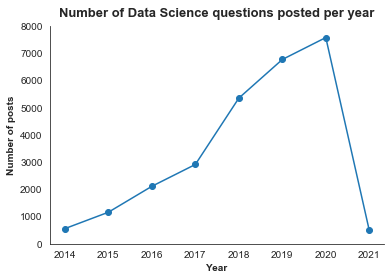

In [134]:
ax = question_year.plot.line(x='Year', y='NrOfPosts', marker="o")
ax.set_title('Number of Data Science questions posted per year', fontweight='bold',
            fontsize=13, pad=10)
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Number of posts', fontweight='bold')
ax.set_ylim(0,8000)
ax.get_legend().remove()
sns.despine();

So it's clear that the number of questions asked has been rising yearly, with 2021 being low only due to this query being run in January 2021. 

As we are interested in writing content in the most popular areas, it makes sense to use the most recent complete year, **2020**.

To extract all the questions from 2020, we can use the following query:

``` SQL
SELECT 
       id,
       PostTypeId,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM posts
  WHERE YEAR(CreationDate) = 2020 AND PostTypeId = 1;
```

The output is a CSV file ('*2020_questions.csv*') that we can read into pandas.

In [135]:
# Now importing the CSV into pandas
questions = pd.read_csv('2020_questions.csv', parse_dates=['CreationDate'])

In [136]:
questions.head(5)

,id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,68060,1,2020-02-14 03:27:13,4,82,<classification><dataset><clustering>,2,NaN
1,68061,1,2020-02-14 05:15:48,2,33,<convolution>,0,NaN
2,68063,1,2020-02-14 05:46:13,0,38,<nlp><azure-ml>,0,NaN
3,68066,1,2020-02-14 08:07:48,0,19,<machine-learning><cnn><image-classification>,0,NaN
4,68071,1,2020-02-14 09:53:51,0,11,<deep-learning><cnn><recurrent-neural-net><act...,0,NaN


## Exploring the data

Now to explore the dataframe in order to identify any cleaning that is required.

In [137]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7588 non-null   int64         
 1   PostTypeId     7588 non-null   int64         
 2   CreationDate   7588 non-null   datetime64[ns]
 3   Score          7588 non-null   int64         
 4   ViewCount      7588 non-null   int64         
 5   Tags           7588 non-null   object        
 6   AnswerCount    7588 non-null   int64         
 7   FavoriteCount  931 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 474.4+ KB


The dataset is generally very clean, however:

1. There are a lot of NaN values in the FavoriteCount column. This is where a question has not been favourited at all, and so these entries need to be changed to zero.

2. The Tags column will be easier to analyse if it is first converted into a string type.

Currently the Tags column is stored as the all-encompassing 'object' type, but this could consist of any type. So identifying what type it is:

In [138]:
# Apply the type function to each element of the series, and return the unique types
questions["Tags"].apply(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

So all the objects are strings, which is useful for analysis.

## Cleaning the data

In [139]:
# Firstly replace NaN values with 0 for FavoriteCount
questions.fillna(0, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7588 non-null   int64         
 1   PostTypeId     7588 non-null   int64         
 2   CreationDate   7588 non-null   datetime64[ns]
 3   Score          7588 non-null   int64         
 4   ViewCount      7588 non-null   int64         
 5   Tags           7588 non-null   object        
 6   AnswerCount    7588 non-null   int64         
 7   FavoriteCount  7588 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 474.4+ KB


In [140]:
# Secondly replace the < and > symbols with commas in the Tags column
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.head(5)

,id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,68060,1,2020-02-14 03:27:13,4,82,"[classification, dataset, clustering]",2,0
1,68061,1,2020-02-14 05:15:48,2,33,[convolution],0,0
2,68063,1,2020-02-14 05:46:13,0,38,"[nlp, azure-ml]",0,0
3,68066,1,2020-02-14 08:07:48,0,19,"[machine-learning, cnn, image-classification]",0,0
4,68071,1,2020-02-14 09:53:51,0,11,"[deep-learning, cnn, recurrent-neural-net, act...",0,0


In [141]:
questions["Tags"].apply(lambda x: type(x)).unique()

array([<class 'list'>], dtype=object)

Good, so now the Tags column is in a list format which will make it easy to iterate through the tags.

## Q1. What is the most used tag?<a id='q_1'></a>

To determine the popularity of different topics we will look at the most used tags, how many times a question with a tag was viewed, and which tags are associated with the questions with the highest scores.

In [142]:
# Go through all questions and count how many times each tag is used.
tag_count = {}

def dict_add(tag_list):
    for tag in tag_list:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
questions["Tags"].apply(dict_add);           

To make analysis easier we can construct a dataframe from the dictionary.

In [143]:
tag_count = pd.DataFrame.from_dict(tag_count, orient="index", columns=['Count'])

In [144]:
tag_count.sort_values(by="Count", inplace=True)
tag_count.tail(20)

,Count
feature-selection,194
predictive-modeling,207
r,220
clustering,249
statistics,254
pandas,275
dataset,316
lstm,317
regression,361
cnn,364


Some of these tags are very broad, such as 'Python' or 'r', and it's noticeable how quickly tag usage drops in just the top 20 used tags.

In [145]:
# Get the top 20 most used tags for plotting
most_used_tags = tag_count.tail(20)

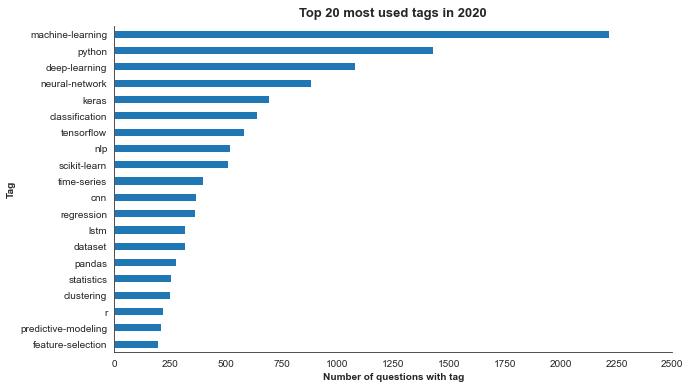

In [146]:
ax = most_used_tags.plot.barh(figsize=(10,6))
ax.set_title('Top 20 most used tags in 2020', fontsize=13, fontweight='bold', pad=10)
ax.set_ylabel('Tag', fontweight='bold')
ax.set_xlabel('Number of questions with tag', fontweight='bold')
ax.set_xlim(0,2500)
ax.set_xticks(np.arange(0,2750,250))
ax.get_legend().remove()
sns.despine();

## Q2. What is the most viewed tag?<a id ='q_2'></a>

In [147]:
# Go through each row (and each tag in that row) and add up the view counts
tag_views ={}

def dict_views(row):
    view_count = row['ViewCount']
    tag_list = row['Tags']
    for tag in tag_list:
        if tag in tag_views:
            tag_views[tag] += view_count
        else:
            tag_views[tag] = view_count

questions.apply(dict_views, axis=1);

In [148]:
# Now convert it to a dataframe for analysis and plotting
tag_views = pd.DataFrame.from_dict(tag_views, orient='index', columns=['Views'])
tag_views.sort_values(by='Views', inplace=True) # Sort values
most_viewed_tags = tag_views.tail(20) # Get top 20 most viewed tags

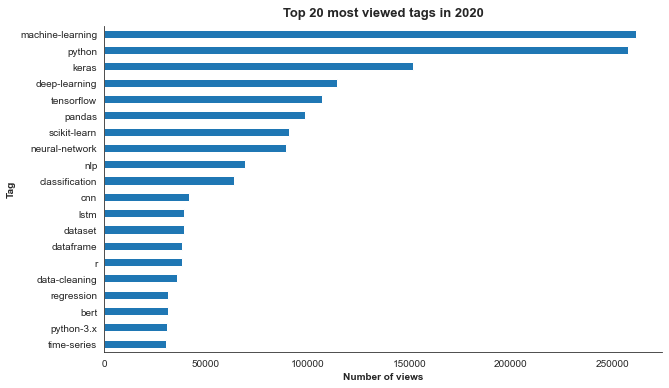

In [149]:
ax = most_viewed_tags.plot.barh(figsize=(10,6))
ax.set_title('Top 20 most viewed tags in 2020', fontsize=13, 
             fontweight='bold', pad=10)
ax.set_xlabel('Number of views', fontweight='bold')
ax.set_ylabel('Tag', fontweight='bold')
ax.get_legend().remove()
sns.despine();

## Q3. What is the highest scored tag?<a id = 'q_3'></a>

This will look at which tags are most commonly found with the highest score questions. Questions can be voted up (or down) by users depending on their importance and interest to members of the Data Science community. Choosing topics which are commonly found in highly scored questions increases the chances that they will be popular content.

In [150]:
# Iterate through the rows and count the scores associated with each tag
tag_scores ={}

for index, row in questions.iterrows():
    tag_list = row["Tags"]
    for tags in tag_list:
        if tags in tag_scores:
            tag_scores[tags] += row["Score"]
        else:
            tag_scores[tags] = row["Score"]

In [151]:
# Convert dictionary to a dataframe for analysis and plotting
tag_scores = pd.DataFrame.from_dict(tag_scores, orient="index", columns=['Score'])
tag_scores.sort_values(by='Score', inplace=True) # Sort values
highest_scored_tags = tag_scores.tail(20) # Get top 20 most viewed tags

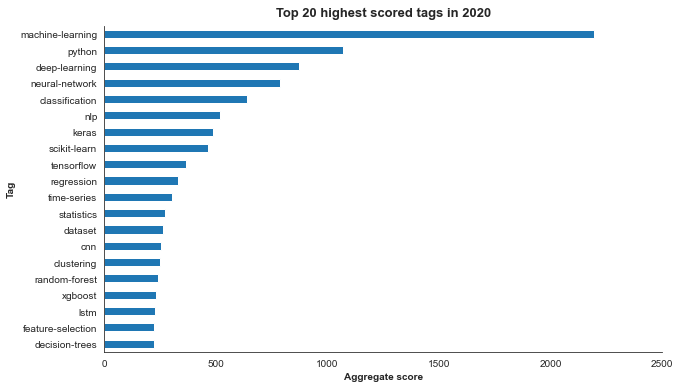

In [152]:
ax = highest_scored_tags.plot.barh(figsize=(10,6))
ax.set_title('Top 20 highest scored tags in 2020', fontsize=13, 
             fontweight='bold', pad=10)
ax.set_xlabel('Aggregate score', fontweight='bold')
ax.set_ylabel('Tag', fontweight='bold')
ax.set_xlim(0,2500)
ax.get_legend().remove()
sns.despine();

### Plotting all three metrics side by side shows that they share similar tags

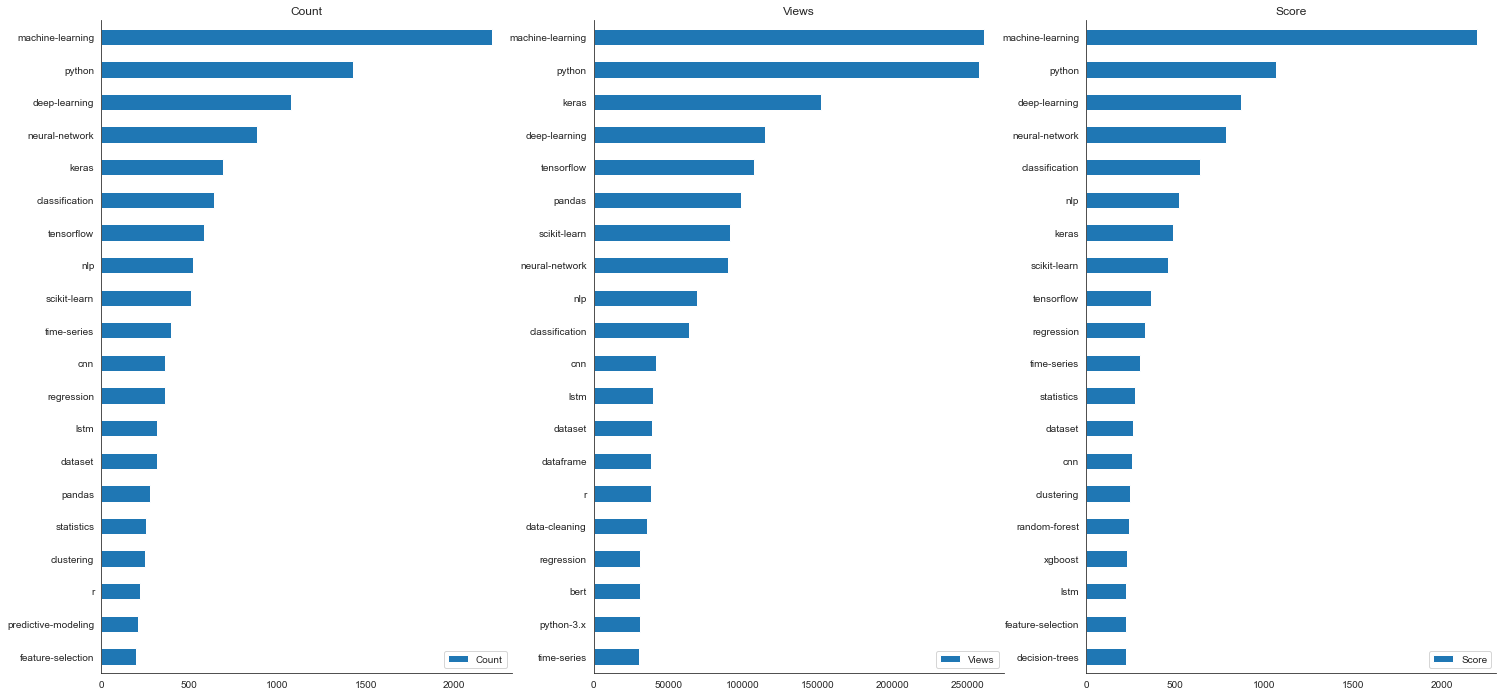

In [153]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,12))
ax1 = most_used_tags.plot.barh(ax=axes[0], subplots=True)
ax2 = most_viewed_tags.plot.barh(ax=axes[1], subplots=True)
ax3 = highest_scored_tags.plot.barh(ax=axes[2], subplots=True)
sns.despine();

## Q4. What are the relations between tags?<a id= "q_4"></a>

It is clear that a lot of the tags are the same across the top 20 most used, viewed, and scored. It is important to understand the relationship between these tags because many are used together and related. For example *pandas* is linked to *python*, because it is a Python library. So finding which tags are commonly associated together will allow us to better understand the most popular questions.


### Q4a. How many tags are there per question?<a id = 'q_4a'></a>

In [154]:
# How many tags are there per question?
nr_tags = {}

for index, row in questions.iterrows():
    tags = len(row["Tags"])
    if tags in nr_tags:
        nr_tags[tags] += 1
    else:
        nr_tags[tags] = 1

nr_tags

{3: 2002, 1: 718, 2: 1562, 4: 1742, 5: 1564}

So **most questions have at least 2 tags** with the largest proportion having 3 tags. This emphasises the importance of investigating the relationship between tags.

### Q4b. Which top 20 tags are not present across all metrics?<a id= 'q_4b'></a>

It's also worth identifying any tags in the top 20 most used, viewed, and scored that are not present in all the 3 metrics.

In [155]:
# Convert index of top 20 metrics to sets and compare together
set1 = set(most_used_tags.index.values)
set2 = set(most_viewed_tags.index.values)
set3 = set(highest_scored_tags.index.values)

# Identify the intersections of all three sets
int_set = set1.intersection(set2)
results_set = int_set.intersection(set3)

print("The following {} tags are in all three of the top 20 metrics: ".format(len(list(results_set))), 
                                                                              list(results_set))

The following 14 tags are in all three of the top 20 metrics:  ['nlp', 'neural-network', 'classification', 'cnn', 'dataset', 'time-series', 'tensorflow', 'python', 'scikit-learn', 'lstm', 'regression', 'machine-learning', 'keras', 'deep-learning']


So **14** of the top 20 tags are the same across all three metrics (most viewed, used, scored). Now to identify those tags which aren't common across all three.

In [156]:
# Now to identify tags which aren't common across all three

s1 = set1.difference(results_set)

print("The following {} top 20 Most Used tags are not present in all three top 20 metrics: ".format(len(list(s1))),
     list(s1), "\n")

s2 = set2.difference(results_set)

print("The following {} top 20 Most Viewed tags are not present in all three top 20 metrics: ".format(len(list(s2))),
     list(s2), "\n")

s3 = set3.difference(results_set)

print("The following {} top 20 Highest Scored tags are not present in all three top 20 metrics: ".format(len(list(s3))),
     list(s3), "\n")

The following 6 top 20 Most Used tags are not present in all three top 20 metrics:  ['statistics', 'pandas', 'predictive-modeling', 'clustering', 'feature-selection', 'r'] 

The following 6 top 20 Most Viewed tags are not present in all three top 20 metrics:  ['data-cleaning', 'pandas', 'dataframe', 'bert', 'r', 'python-3.x'] 

The following 6 top 20 Highest Scored tags are not present in all three top 20 metrics:  ['statistics', 'decision-trees', 'clustering', 'random-forest', 'feature-selection', 'xgboost'] 



So all in each metric there are **6 tags** that are not common across all three metrics, however it is noticeable that **many of these tags are found in at least two of the three metrics**.

Some of these tags are languages (e.g. python, r) and so can be ignored. Numerous others are specific statistical concepts/techniques often used in machine learning (e.g. clustering, feature selection, BERT, decisions trees, random forest, predictive modelling), and given machine learning is the top tag across all metrics, not including these tags will not affect our analysis.

### Q4c. Which pairs of tags are commonly used together (by number)?<a id ='q_4c'></a>

To help determine the relationship between tags we can count how many times a pair of tags appears together in a question. This can then show what topics are popular.

We can do this using a dataframe that counts how many times a tag is found paired with another tag (or itself).

e.g.

|       | Tag 1 | Tag 2 | Tag 3 |
| ----- | ----- | ----- | ----- |
| Tag 1 | | | |
| Tag 2 | | | |
| Tag 3 | | | |


In [157]:
# First create a list of all the tags
tag_list = list(tag_count.index)

# Create a dataframe with tags and columns and index
tag_relations = pd.DataFrame(index=tag_list, columns=tag_list)

# Print first 5 rows to show it
tag_relations.iloc[0:5,0:5]

,project-planning,federated-learning,normal-equation,probabilistic-programming,data-stream-mining
project-planning,NaN,NaN,NaN,NaN,NaN
federated-learning,NaN,NaN,NaN,NaN,NaN
normal-equation,NaN,NaN,NaN,NaN,NaN
probabilistic-programming,NaN,NaN,NaN,NaN,NaN
data-stream-mining,NaN,NaN,NaN,NaN,NaN


In [158]:
# Now fill all the NaN values with 0
tag_relations.fillna(0, inplace=True)

#Now go through each Tags list in the Tags column and count the pairs of individual tags that are together

for tags in questions["Tags"]:
    tag_relations.loc[tags,tags] += 1

In [159]:
tag_relations

,project-planning,federated-learning,normal-equation,probabilistic-programming,data-stream-mining,software-development,noisification,hinge-loss,nlg,surrogate,...,time-series,scikit-learn,nlp,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
project-planning,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
federated-learning,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
normal-equation,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
probabilistic-programming,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
data-stream-mining,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
keras,0,0,0,0,0,0,0,0,0,0,...,39,20,15,295,26,693,136,190,187,133
neural-network,0,0,0,0,0,0,0,0,0,0,...,33,13,30,98,64,136,881,280,85,292
deep-learning,0,1,0,0,1,0,0,0,0,0,...,49,5,78,153,66,190,280,1078,125,411
python,0,0,0,1,1,0,0,0,0,0,...,62,197,83,134,94,187,85,125,1426,387


A large number of the tags are not paired with many other tags, so to simplify the analysis the dataframe will be filtered to only include the top 20 Most Used tags.

In [160]:
# Highlights tags with over 200 pairings in green
# def highlight_popular_tags(val):
#     color = 'green' if val > 200 else ''
#     return 'background-color: %s' % color

# tag_relations_viewed.style.applymap(highlight_popular_tags)

In [161]:
# Filter to only include the top 20 most used tags
tag_relations_used = tag_relations.loc[most_used_tags.index, most_used_tags.index]

# Style some cells for ease of reading
def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    # Colour diagonal
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df
tag_relations_used.style.applymap(style_cells)
tag_relations_used.style.apply(style_cells, axis=None)

,feature-selection,predictive-modeling,r,clustering,statistics,pandas,dataset,lstm,regression,cnn,time-series,scikit-learn,nlp,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
feature-selection,194,6,4,5,9,6,6,3,9,1,2,20,5,0,8,3,15,14,29,74
predictive-modeling,6,207,5,7,21,4,11,5,25,1,26,10,2,3,28,2,10,16,39,91
r,4,5,220,15,14,1,11,3,17,0,11,1,6,2,12,6,13,3,26,53
clustering,5,7,15,249,5,2,6,0,5,0,11,22,12,3,20,0,2,6,54,60
statistics,9,21,14,5,254,4,14,2,19,0,18,7,5,3,16,1,8,17,31,91
pandas,6,4,1,2,4,275,20,4,3,0,15,31,8,0,2,3,2,1,167,24
dataset,6,11,11,6,14,20,316,2,12,7,18,10,15,14,25,11,21,32,38,89
lstm,3,5,3,0,2,4,2,317,10,17,82,0,24,40,9,96,55,84,43,72
regression,9,25,17,5,19,3,12,10,361,5,32,38,3,9,37,22,32,21,57,122
cnn,1,1,0,0,0,0,7,17,5,364,12,3,5,54,21,79,84,136,36,85


In blue is the number of times each tag has been used, with machine learning the most popular by far (2217 times) followed by python (1426).

To make this easier to understand we can represent these pairings with a heatmap.

In [162]:
# Firstly get rid of the values in blue as they will skew the heatmap

for i in range(tag_relations_used.shape[0]):
    tag_relations_used.iloc[i,i] = np.NaN

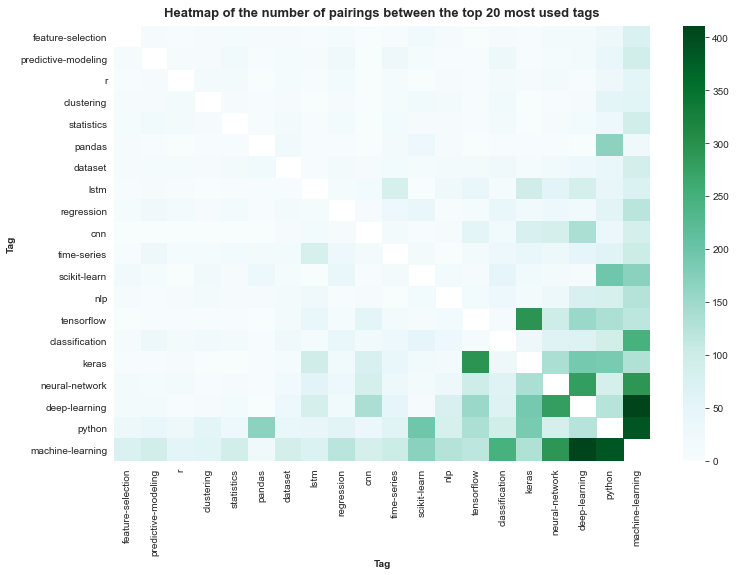

In [163]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(tag_relations_used, cmap="BuGn", annot=False)
ax.set_title('Heatmap of the number of pairings between the top 20 most used tags',
            fontsize=13, fontweight='bold', pad=10)
ax.set_xlabel('Tag', fontweight='bold')
ax.set_ylabel('Tag', fontweight='bold');

It's clear that some tags are commonly paired together, such a *python* and *pandas*. To help understand proportionally how often each tag is paired with another it'd be useful to represent this information as percentages too.

### Q4d. Which pairs of tags are commonly used together (by percentage)?<a id ='q_4d'></a>

In [164]:
# Create a copy of the existing df to calculate %
tag_relations_percent = tag_relations_used.copy()

In [165]:
# Define a function which calculates the % of times a tag is paired with another

# First get a list of all the columns to iterate through
cols_list = tag_relations_percent.columns

def tag_percents(row):
    tag_sum = row.sum(skipna=True) #total number of pairings with a tag (tag from row)
    for cols in cols_list:
        value = row[cols] #tag's occurences with tag (from row)
        row[cols] = (value / tag_sum) *100

In [166]:
# Apply the function
tag_relations_percent.apply(tag_percents, axis=1);

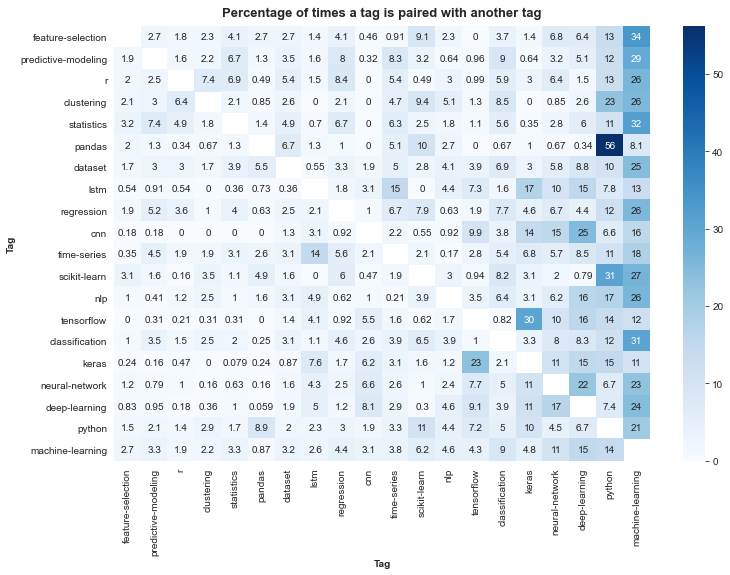

In [167]:
# Plot results
plt.figure(figsize=(12,8))
ax = sns.heatmap(tag_relations_percent, cmap="Blues", annot=True)
ax.set_title('Percentage of times a tag is paired with another tag',
            fontsize=13, fontweight='bold', pad=10)
ax.set_xlabel('Tag', fontweight='bold')
ax.set_ylabel('Tag', fontweight='bold');

## Findings:<a id ='q_4findings'></a>

This heatmap helps us understand some of the relationships between pairs of tags:

* When the *pandas* tag is used, 56% of the time so is the *python* tag. This isn't surprising given that pandas is a python library.
* When the *scikit-learn* tag is used, 31% of the time so is the *python* tag, and 27% of the time so is the *machine-learning* tag.
* When the *feature-selection* tag is used, 34% of the time so is the *machine-learning* tag. However, it's worth noting that the *machine-learning* tag is used a lot more frequently, so when the *machine-learning* tag is used, the tag *feature-selection* only makes up 2.7% of the total tags paired to it.

What's noticeable is that there is cluster of tags that are paired together frequently. A number of these are related to deep learning techniques, via libraries (such as Keras, TensorFlow, and scikit-learn), or techniques/themes (such as classification and neural networks).

**Based on this I would recommend focusing on content that covers deep learning as it is currently a very popular topic.**

However, there are some caveats to this advice:

* This analysis only looked at tags that are paired together and it could be that certain tags are used a lot and so frequently end up paired together, but are not related strongly between themselves. 
* Secondly this only looks at pairs of tags and not groups of multiple tags. The implication of this is that e.g. *python* is used a lot with *classification* and *scikit-learn* but that doesn't mean that *python* has such a strong relationship to each individually.

To overcome the second caveat we could use [association rules](https://en.wikipedia.org/wiki/Association_rule_learning).

## Q5. Is deep learning just a fad?<a id='q_5'></a>

Whilst based on 2020 data deep learning is the most popular topic to focus on this may not be true going forwards. To see how the popularity of deep learning questions has changed over time, we'll check the proportion and number of deep learning questions asked in the Data Science site over all years.


To extract all the questions, we can use the following query on the site's [Data Explorer](https://data.stackexchange.com/datascience/query/new):

``` SQL
SELECT 
       id,
       PostTypeId,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM posts
  WHERE YEAR(CreationDate) <> 2021 AND PostTypeId = 1;
```

The output is a CSV file ('*all_questions.csv*') that we can read into pandas.

In [168]:
# Read the csv file into pandas

all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

all_questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26485 entries, 0 to 26484
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             26485 non-null  int64         
 1   PostTypeId     26485 non-null  int64         
 2   CreationDate   26485 non-null  datetime64[ns]
 3   Score          26485 non-null  int64         
 4   ViewCount      26485 non-null  int64         
 5   Tags           26485 non-null  object        
 6   AnswerCount    26485 non-null  int64         
 7   FavoriteCount  7440 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 1.6+ MB


In [169]:
# As before clean up the FavoriteCount column and turn the Tags column objects into lists
all_questions.fillna(0, inplace=True)

In [170]:
# Clean up Tags column
all_questions["Tags"] = all_questions["Tags"].str.replace("^<|>$", "").str.split("><")

In [171]:
#Check type of the Tags column to ensure that it is easily usable
all_questions["Tags"].apply(lambda x: type(x)).unique()

array([<class 'list'>], dtype=object)

Now to identify those questions with deep learning tags. To do this I have firstly identified the top deep learning packages and methods from these sites:
([1](https://www.kdnuggets.com/2018/11/top-python-deep-learning-libraries.html), [2](https://towardsdatascience.com/best-python-libraries-for-machine-learning-and-deep-learning-b0bd40c7e8c), and [3](https://www.pyimagesearch.com/2016/06/27/my-top-9-favorite-python-deep-learning-libraries/)).

In [172]:
deep_learning_tags = ["deep-learning", "tensorflow", "pytorch", "theano", "caffe", "fastai", "tflearn", "keras", 
                     "scikit-learn", "nltk", "mxnet", "neural-network", "lstm", "cnn", "nlp", "computer-vision",
                     "audio-recognition", "image-recognition", "reinforcement-learning", "machine-translation"]

In [173]:
# Way to check if tags exist
# all_tags = set()

# for tags in all_questions["Tags"]:
#     for tag in tags:
#         all_tags.add(tag)

# 'keras' in all_tags

In [174]:
# A function to determine if there are deep learning tags in a question
def deep_learning_assign(tag_list):
    for tag in tag_list:
        if tag in deep_learning_tags:
            return 1
    return 0 # if none of the tags

# Now apply function to the df    
all_questions["DeepLearning"] = all_questions["Tags"].apply(deep_learning_assign)

In [175]:
# Sample df to see the results
all_questions.sample(10)

,id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning
3958,62195,1,2019-10-25 01:29:10,0,22,"[statistics, pytorch, variance, weight-initial...",1,0.0,1
4636,80460,1,2020-08-18 16:58:43,0,14,"[deep-learning, keras, gan, generative-models]",1,0.0,1
7724,52391,1,2019-05-22 11:18:32,3,75,"[data, visualization, dimensionality-reduction...",1,0.0,0
15876,60174,1,2019-09-13 22:46:40,0,45,[pandas],1,0.0,0
3880,39800,1,2018-10-16 23:24:50,2,190,"[machine-learning, neural-network, deep-learni...",1,0.0,1
4770,62452,1,2019-10-31 08:07:49,0,1482,"[pandas, dataframe]",2,0.0,0
9083,64138,1,2019-12-03 10:21:08,2,54,"[machine-learning, python, machine-learning-mo...",0,0.0,0
14816,77124,1,2020-07-04 12:29:38,0,45,"[tensorflow, training, accuracy]",1,0.0,1
15284,2395,1,2014-11-03 16:51:47,15,3140,"[neural-network, time-series, regression]",3,3.0,1
10187,31212,1,2018-05-04 13:15:12,3,684,"[machine-learning, neural-network]",1,0.0,1


To see how number of deep learning questions has changed over time, we need to select a suitable time period. With 7 years of data, let's group it first by year.

In [176]:
# Create a year column
all_questions["Year"] = all_questions["CreationDate"].dt.year

In [177]:
# Define aggregate function
agg_func_dl = {'DeepLearning': ['sum','count']}

# Create a groupby object and aggregate by DeepLearning column sum and size
questions_year = all_questions.groupby('Year').agg(agg_func_dl)

In [178]:
questions_year

DeepLearning      
              sum count
Year                   
2014           82   559
2015          229  1162
2016          691  2116
2017         1265  2919
2018         2681  5360
2019         3138  6781
2020         3578  7588

In [179]:
# Now to clean up the columns, reset the index, 
# and calculate the % of total questions that are deep learning ones
questions_year.columns=['DeepLearningQuestion', 'TotalQuestions']
questions_year["DeepLearningRate"] = (questions_year["DeepLearningQuestion"] /\
                                     questions_year["TotalQuestions"]) * 100
questions_year.reset_index(inplace=True)

In [180]:
questions_year

,Year,DeepLearningQuestion,TotalQuestions,DeepLearningRate
0,2014,82,559,14.669052
1,2015,229,1162,19.707401
2,2016,691,2116,32.655955
3,2017,1265,2919,43.336759
4,2018,2681,5360,50.018657
5,2019,3138,6781,46.276360
6,2020,3578,7588,47.153400


In [181]:
questions_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  7 non-null      int64  
 1   DeepLearningQuestion  7 non-null      int64  
 2   TotalQuestions        7 non-null      int64  
 3   DeepLearningRate      7 non-null      float64
dtypes: float64(1), int64(3)
memory usage: 352.0 bytes


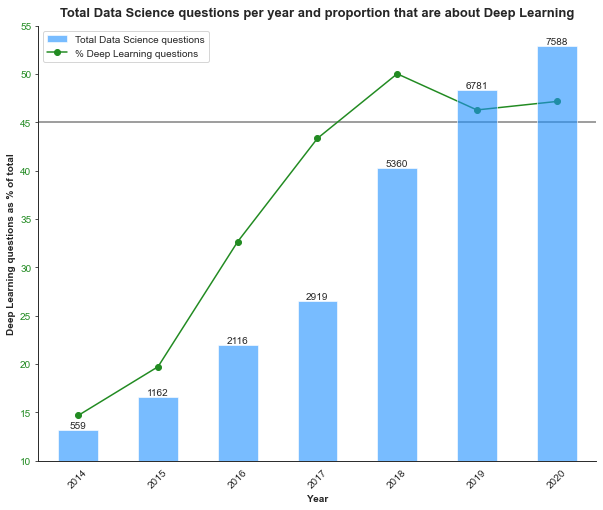

In [182]:
# Plot line chart
ax1 = questions_year.plot(x="Year", y="DeepLearningRate", kind="line",
                         linestyle="-", marker="o", color="forestgreen",
                          figsize=(10,8), label="% Deep Learning questions",
                          use_index=False) #Bar plots are categorical, so to plot line need
                                           #its index to also be categorical! Only works well
                                           #because index is the same for both.


#Plot bar graph
ax2 = questions_year.plot(x="Year", y="TotalQuestions", kind="bar",
                         secondary_y=True, ax=ax1,
                          color="dodgerblue", alpha=0.6, rot=45,
                         label="Total Data Science questions")
sns.set_style("white")
sns.despine()

ax1.set_title("Total Data Science questions per year and proportion that are about Deep Learning",
             fontsize=13, fontweight='bold', pad=10)
ax1.set_xlabel("Year", fontweight='bold')
ax1.set_ylabel("Deep Learning questions as % of total", fontweight='bold')
ax1.set_ylim(10,55)

# Add text to the bar chart (ax2)
# Get index (x value), and value (y value) so can position text on axis
for index, value in questions_year["TotalQuestions"].iteritems():
    #print(f"Index : {index}, Value : {value}")
    # ax.text(x,y,str,kwargs)
    ax2.text(index,value +0,str(value), horizontalalignment='center',
            verticalalignment='bottom')

# Now can remove secondary y axis and y axis labels
ax2.tick_params(right=False, labelright=False)
# Colour y axis labels to make it easier to identify with line
ax1.tick_params(axis="y", labelcolor="forestgreen")

# Now to sort out the legend
# Remove existing legend
ax1.get_legend().remove()

# Get the handles and labels for each axes separately
# This way avoid the addition of label (right) to second element
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Now set the legend
ax1.legend(handles=h2+h1,
          labels=l2+l1,
           loc=2)

# Add a horizontal line
ax1.hlines(45,-1,7,color="grey");

Deep learning has grown rapidly in popularity since 2015, and **for the past 3 years has made up over 45% of all Data Science questions asked**. It seems to have plateaued at just under half of all questions but that still makes it a very popular topic.

## Q6. How many questions are asked about Python vs. R?<a id ='q_6'></a>

Python is a fast growing and increasingly popular language [for developers](https://insights.stackoverflow.com/survey/2019#most-popular-technologies), and substitutes for some of the statistical work traditionally carried out in R. It'd be interesting to see if the growing popularity of Python over R is reflected in the number of questions asked about each languaage on the Q&A site.

In [183]:
# Identify 'python' and 'r' tags and assign values to columns

def python_assign(tag_list):
    if "python" in tag_list:
        return 1
    return 0

def r_assign(tag_list):
    if "r" in tag_list:
        return 1
    return 0

all_questions["Python"] = all_questions["Tags"].apply(python_assign)
all_questions["R"] = all_questions["Tags"].apply(r_assign)

all_questions.sample(5)

,id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning,Year,Python,R
17387,64878,1,2019-12-15 14:31:20,1,139,"[machine-learning, data-mining, predictive-mod...",1,0.0,0,2019,0,0
3949,62167,1,2019-10-24 13:40:44,1,42,[reinforcement-learning],2,0.0,1,2019,0,0
15789,48064,1,2019-03-27 06:34:13,-1,50,[data-science-model],1,0.0,0,2019,0,0
12360,76249,1,2020-06-18 18:23:59,1,13,"[regression, error-handling]",1,1.0,0,2020,0,0
5659,80778,1,2020-08-25 12:59:45,0,20,"[machine-learning, deep-learning, keras, autoe...",0,0.0,1,2020,0,0


In [184]:
all_questions[(all_questions["R"] ==1) & (all_questions["Python"] ==1)]

,id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,DeepLearning,Year,Python,R
47,16337,1,2017-01-15 22:47:24,2,649,"[python, r, clustering]",0,0.0,0,2017,1,1
544,5193,1,2015-02-20 14:09:23,6,13054,"[machine-learning, r, python]",2,11.0,0,2015,1,1
1018,78187,1,2020-07-23 12:19:54,2,80,"[python, r, regression, correlation]",2,0.0,0,2020,1,1
1054,5371,1,2015-03-22 18:53:39,3,3622,"[r, python, performance]",2,0.0,0,2015,1,1
1405,61070,1,2019-10-01 04:09:51,5,391,"[python, r, pipelines]",3,0.0,0,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25943,13489,1,2016-08-17 08:57:48,0,3168,"[python, r, clustering, time-series]",1,1.0,0,2016,1,1
25946,13504,1,2016-08-17 19:08:17,5,593,"[machine-learning, python, r, data, apache-had...",8,1.0,0,2016,1,1
25974,35878,1,2018-07-22 16:47:50,0,94,"[python, r, scikit-learn, dataset, categorical...",1,0.0,1,2018,1,1
25992,35947,1,2018-07-24 06:33:49,0,123,"[python, r]",1,0.0,0,2018,1,1


So there are 142 questions where both python and r are tagged. Normally you'd expect that these two langauges would not be tagged in the same question. Looking into a sample of questions (using url https://datascience.stackexchange.com/questions/id) it is clear that many are about which language to learn, or asking how to translate a process from one langauage to another.



In [185]:
# Now to count the number of Python and R questions

agg_dict = {"Python":"sum", "R":"sum"}

# Create a groupby object
lang_year = all_questions.groupby("Year").agg(agg_dict)
#lang_year.reset_index(inplace=True)

In [186]:
lang_year

,Python,R
Year,,
2014,43,54
2015,130,153
2016,313,208
2017,471,204
2018,1062,199
2019,1448,194
2020,1426,220


In [187]:
lang_year["Difference"] = lang_year["Python"] - lang_year["R"]

In [188]:
# Apply a function to generate a string which shows 
# how much each language is leading by
def format_difference(value):
    if value < 0:
        return "R +"+str((-1*value))
    if value >0:
        return "Python +"+str(value)

lang_year["Leading_language"] = lang_year["Difference"].apply(format_difference)

In [189]:
lang_year

,Python,R,Difference,Leading_language
Year,,,,
2014,43,54,-11,R +11
2015,130,153,-23,R +23
2016,313,208,105,Python +105
2017,471,204,267,Python +267
2018,1062,199,863,Python +863
2019,1448,194,1254,Python +1254
2020,1426,220,1206,Python +1206


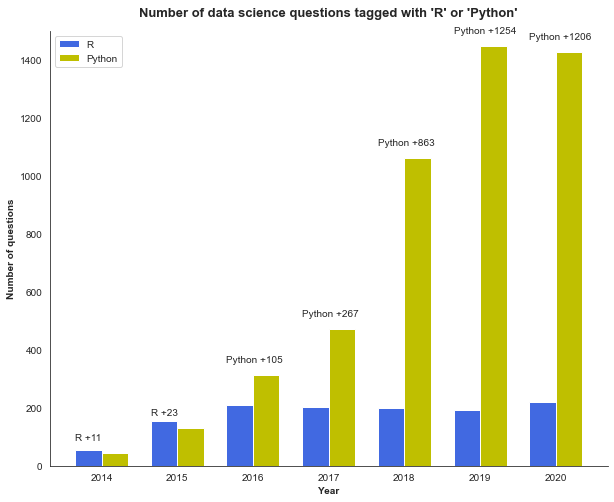

In [190]:
# Now to plot
sns.set_style('white')
N =7
ind = np.arange(N) # set x values for bars
width = 0.35 # set width of bars

fig, ax = plt.subplots(figsize=(10,8))
# Plot bars
r_bars = ax.bar(x=lang_year.index-(width/2),height=lang_year["R"],width=width, 
                label="R", color="royalblue")
py_bars = ax.bar(lang_year.index+(width/2), lang_year["Python"], width, 
                 label="Python", color="y")

sns.despine()
ax.set_title("Number of data science questions tagged with 'R' or 'Python'",
            fontsize=13, fontweight='bold', pad=15)
ax.set_xlabel("Year", fontweight='bold')
ax.set_ylabel("Number of questions", fontweight='bold')
ax.set_ylim(0,1500)
ax.legend()

# Set axis text
for x in lang_year.index: #Loop through years in index
    # ax.text(x,y,str,kwargs)
    ax.text(x-width,lang_year.loc[x,"Python"]+45,lang_year.loc[x,"Leading_language"]);

From 2014-15 *R* was tagged in slightly more questions than *Python*, however since 2016 *Python* questions have increasingly outstripped *R*. 

**What's noticeable is that the number of questions with *R* as a tag has stayed mostly flat since 2014, so the difference with *Python* is mostly due to the number of Python questions rising rapidly.**

**However**, the overall popularity of each language will be higher because many questions will not tag the language explicitly because it will be obvious from the topic e.g. questions about *Rstudio* will refer to *R* (even if *R* is not tagged), whilst questions on *pandas* will refer to *Python*.

## Conclusion

Deep Learning topics are very popular data science questions and so it would be worthwhile to focus building content in that area.

Python is the most popular language (in terms of number of tags) so it looks like a good language to focus on. However, with less questions asked about R, it may be that there is an untapped niche of users who would value deep learning content in R.